<a href="https://colab.research.google.com/github/giuliaries/MachineLearning/blob/main/Perceptron_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Giulia Santoiemma](mailto:giulia.santoiemma@studenti.unipd.it) 2004775<br/>
Machine Learning<br/> 
Master Degree in Computer Science<br/>
25 October 2021

In [ ]:
# Import libraries
from sklearn.datasets import make_classification

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Global variables
eta = 0.5 # learning rate
points_number = 100

In [ ]:
# Perceptron Implementation
# x: m*n matrix containing m n-dimension example, one in each row
# y: vector of the target values
def my_perceptron(x, y):
  i, steps = 0, 0
  rows, cols = x.shape

  # Initialize the value of the weights w randomly
  w = np.random.rand(cols, 1)
  y1 = np.sign(np.dot(x, w))
    
  # the algorithm loops until the predicted values are equal to y    
  while not np.array_equal(y1, y):
    x_i = x[i, :].reshape(-1, 1) # i-th rows of the training set
    t = y[i] # current classification
        
    # Learning Step
    o = np.sign(np.dot(w.T, x_i))
    if o != t:
      w = w + eta * (t - o) * x_i
      y1 = np.sign(np.dot(x, w))
        
    # the index i is increased so in the next round a different example x is selected, 
    # when it reaches m it restarts from 0
    i = (i + 1) % rows
    steps += 1
    
  print("Training steps: ", steps)
  return w

,ones,x,y,t
0,1.0,12.171167,-0.983138,1.0
1,1.0,-10.331245,-2.941819,-1.0
2,1.0,18.814031,16.956486,1.0
3,1.0,-9.946706,2.798162,-1.0
4,1.0,4.047379,9.847317,1.0
...,...,...,...,...
95,1.0,-11.141948,3.538088,-1.0
96,1.0,-9.525444,-7.534866,-1.0
97,1.0,8.591236,-5.007893,1.0
98,1.0,6.597299,6.170599,1.0


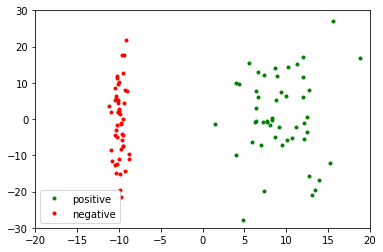

In [ ]:
# Generate a linearly separable dataset by using sklearn.datasets.make_classification
# There is no "linear separable" option, but I reject a dataset when it's not linearly separable, generating another one.
separable = False
while not separable:
  samples = make_classification(n_samples=points_number, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
  red = samples[0][samples[1] == 0]
  blue = samples[0][samples[1] == 1]
  separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])

# Training Set as pd.DataFrame
ts = pd.DataFrame(columns=["ones", "x", "y", "t"])
for k, i in enumerate(samples[0]):
  ts = ts.append({
    "ones": 1.0, 
    "x": i[0] * 10,
    "y": i[1] * 10,
    "t": 1 if samples[1][k] == 1 else -1
  }, ignore_index = True)

plt.plot(ts["x"][ts["t"] == 1], ts["y"][ts["t"] == 1], ".g", label = "positive")
plt.plot(ts["x"][ts["t"] == -1], ts["y"][ts["t"] == -1], ".r", label = "negative")
plt.xlim(-20, 20)
plt.ylim(-30, 30)
plt.legend()

ts

Training steps:  4

Weight vector:
 [[1.73887423e+00]
 [2.14950241e+01]
 [1.15955153e-02]]


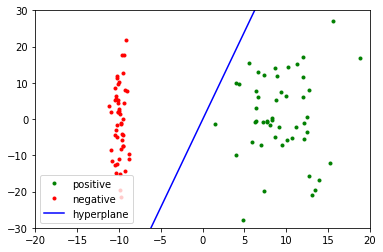

In [ ]:
# Weight vector returned by my perceptron
wv = my_perceptron(ts.to_numpy()[:, :-1], ts.to_numpy()[:, -1].reshape(-1, 1))

plt.plot(ts["x"][ts["t"] == 1], ts["y"][ts["t"] == 1], ".g", label = "positive")
plt.plot(ts["x"][ts["t"] == -1], ts["y"][ts["t"] == -1], ".r", label = "negative")
plt.plot(np.linspace(-20, 20, 100), -(np.linspace(-20, 20, 100) * wv[1, 0] + wv[0, 0]) / wv[2, 0], "-b", label="hyperplane")
plt.xlim(-20, 20)
plt.ylim(-30, 30)
plt.legend()

print("\nWeight vector:\n", pred_w)

Each time we run the algorithm, it returns one of the possible hyperplanes that correctly classify the example.

In this code, we can change the number of the points `points_number` and the learning rate `eta`.<br/><br/>

We see that by selecting a low learning rate `eta`, then we obtain minimal variations on the weight vector `w`: at each step there is a little difference between `w` and `w1`, and the convergence of the algorithm is slow but stable.

Otherwise, if we select a high learning rate `eta`, then we have large variations of the weight vector `w` and the algorithm becomes unstable. There may be a slow convergence, also in this case due to the instability of the algorithm.<br/><br/>

Also, when the instances of the points (positive and negative) tend to be concentrated and spaced apart, the algorithm takes far fewer steps to arrive to the solution, so it converges more quickly.

On the other hand, when the instances are close together, multiple steps are required.<br/><br/>

By increasing the number of points `points_number`, these results are highlighted.